# Project - 1

# Name of Project- Stock Market Prediction 
 
### Description- For most stock investors, the favorite question is "How long should we hold a stock for?". Every investor wants to know how not to act too fearful and too greedy. And not all of them have Warren Buffet to guide them at every  stem. We'd suggest that you stop looking for him. Rather, build your stock market predictor with artificial intelligence tools like Machine Learning. And the approach to this is so simple that you can consider adding this to your Data Science Projects list. 
 

### Importing The Libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing The DataSet

In [64]:
dataset=pd.read_csv("Quote-Equity-HDFC-EQ-01-08-2018-to-30-07-2020.csv",encoding='utf-8',delimiter=',')

In [65]:
dataset.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,29-Jul-2020,EQ,"1,885.00","1,918.50","1,867.20","1,897.35","1,879.65","1,877.30","1,890.21","2,499.90","1,473.45",7413828,"14,013,720,596.85",202540
1,28-Jul-2020,EQ,"1,859.35","1,907.00","1,844.50","1,850.75","1,892.00","1,897.35","1,876.95","2,499.90","1,473.45",4346193,"8,157,568,543.65",175005
2,27-Jul-2020,EQ,"1,841.30","1,861.95","1,824.00","1,841.30","1,853.00","1,850.75","1,842.36","2,499.90","1,473.45",3724639,"6,862,134,768.10",166745
3,24-Jul-2020,EQ,"1,854.00","1,857.80","1,817.00","1,875.80","1,841.00","1,841.30","1,834.05","2,499.90","1,473.45",3309356,"6,069,531,974.80",148129
4,23-Jul-2020,EQ,"1,881.05","1,910.00","1,871.60","1,881.05","1,872.25","1,875.80","1,891.88","2,499.90","1,473.45",3647242,"6,900,158,053.60",121783


In [66]:
dataset.shape

(489, 14)

In [67]:
dataset.columns=['Date','series','OPEN','HIGH','LOW','PREV.CLOSE','ltp','close','vwap','52W H','52W L','VOLUME','VALUE','No of trades']

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          489 non-null    object
 1   series        489 non-null    object
 2   OPEN          489 non-null    object
 3   HIGH          489 non-null    object
 4   LOW           489 non-null    object
 5   PREV.CLOSE    489 non-null    object
 6   ltp           489 non-null    object
 7   close         489 non-null    object
 8   vwap          489 non-null    object
 9   52W H         489 non-null    object
 10  52W L         489 non-null    object
 11  VOLUME        489 non-null    int64 
 12  VALUE         489 non-null    object
 13  No of trades  489 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 53.6+ KB


In [69]:
numerical_data=[feature for feature in dataset.columns if dataset[feature].dtype!='O']

In [70]:
len(numerical_data)

2

In [71]:
numerical_data

['VOLUME', 'No of trades']

In [72]:
dataset['OPEN']

0      1,885.00
1      1,859.35
2      1,841.30
3      1,854.00
4      1,881.05
         ...   
484    1,982.00
485    1,999.00
486    1,945.00
487    1,962.00
488    1,995.00
Name: OPEN, Length: 489, dtype: object

### Data Preprocessing

In [73]:
dataset['Date']=pd.to_datetime(dataset['Date'])

In [74]:
import datetime as dt
dataset['year']=dataset['Date'].dt.year

In [75]:
dataset['month']=dataset['Date'].dt.month
dataset['day']=dataset['Date'].dt.day

In [76]:
dataset.head()

,Date,series,OPEN,HIGH,LOW,PREV.CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,year,month,day
0,2020-07-29,EQ,"1,885.00","1,918.50","1,867.20","1,897.35","1,879.65","1,877.30","1,890.21","2,499.90","1,473.45",7413828,"14,013,720,596.85",202540,2020,7,29
1,2020-07-28,EQ,"1,859.35","1,907.00","1,844.50","1,850.75","1,892.00","1,897.35","1,876.95","2,499.90","1,473.45",4346193,"8,157,568,543.65",175005,2020,7,28
2,2020-07-27,EQ,"1,841.30","1,861.95","1,824.00","1,841.30","1,853.00","1,850.75","1,842.36","2,499.90","1,473.45",3724639,"6,862,134,768.10",166745,2020,7,27
3,2020-07-24,EQ,"1,854.00","1,857.80","1,817.00","1,875.80","1,841.00","1,841.30","1,834.05","2,499.90","1,473.45",3309356,"6,069,531,974.80",148129,2020,7,24
4,2020-07-23,EQ,"1,881.05","1,910.00","1,871.60","1,881.05","1,872.25","1,875.80","1,891.88","2,499.90","1,473.45",3647242,"6,900,158,053.60",121783,2020,7,23


In [77]:
dataset.shape

(489, 17)

### Removing The Unnecessary Columns

In [78]:
dataset.drop(['series','ltp','VALUE','VOLUME','vwap','52W H','52W L'],axis=1,inplace=True)

In [79]:
dataset.shape

(489, 10)

In [80]:
dataset.head()

,Date,OPEN,HIGH,LOW,PREV.CLOSE,close,No of trades,year,month,day
0,2020-07-29,"1,885.00","1,918.50","1,867.20","1,897.35","1,877.30",202540,2020,7,29
1,2020-07-28,"1,859.35","1,907.00","1,844.50","1,850.75","1,897.35",175005,2020,7,28
2,2020-07-27,"1,841.30","1,861.95","1,824.00","1,841.30","1,850.75",166745,2020,7,27
3,2020-07-24,"1,854.00","1,857.80","1,817.00","1,875.80","1,841.30",148129,2020,7,24
4,2020-07-23,"1,881.05","1,910.00","1,871.60","1,881.05","1,875.80",121783,2020,7,23


### Data Preprocessing

In [81]:
dataset['OPEN'].str.isnumeric()

0      False
1      False
2      False
3      False
4      False
       ...  
484    False
485    False
486    False
487    False
488    False
Name: OPEN, Length: 489, dtype: bool

In [82]:
dataset['OPEN']=dataset['OPEN'].str.replace(',','')

In [83]:
dataset.head()

,Date,OPEN,HIGH,LOW,PREV.CLOSE,close,No of trades,year,month,day
0,2020-07-29,1885.00,"1,918.50","1,867.20","1,897.35","1,877.30",202540,2020,7,29
1,2020-07-28,1859.35,"1,907.00","1,844.50","1,850.75","1,897.35",175005,2020,7,28
2,2020-07-27,1841.30,"1,861.95","1,824.00","1,841.30","1,850.75",166745,2020,7,27
3,2020-07-24,1854.00,"1,857.80","1,817.00","1,875.80","1,841.30",148129,2020,7,24
4,2020-07-23,1881.05,"1,910.00","1,871.60","1,881.05","1,875.80",121783,2020,7,23


In [84]:
dataset['OPEN']=dataset['OPEN'].astype('float')

In [85]:
dataset['OPEN'].dtype

dtype('float64')

In [86]:
dataset['HIGH']=dataset['HIGH'].str.replace(',','')
dataset['LOW']=dataset['LOW'].str.replace(',','')
dataset['PREV.CLOSE']=dataset['PREV.CLOSE'].str.replace(',','')
dataset['close']=dataset['close'].str.replace(',','')

In [87]:
dataset['HIGH']=dataset['HIGH'].astype('float')
dataset['LOW']=dataset['LOW'].astype('float')
dataset['PREV.CLOSE']=dataset['PREV.CLOSE'].astype('float')
dataset['close']=dataset['close'].astype('float')

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          489 non-null    datetime64[ns]
 1   OPEN          489 non-null    float64       
 2   HIGH          489 non-null    float64       
 3   LOW           489 non-null    float64       
 4   PREV.CLOSE    489 non-null    float64       
 5   close         489 non-null    float64       
 6   No of trades  489 non-null    int64         
 7   year          489 non-null    int64         
 8   month         489 non-null    int64         
 9   day           489 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 38.3 KB


In [89]:
dataset['year'].unique()

array([2020, 2019, 2018], dtype=int64)

In [92]:
import chart_studio.plotly as plt
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [95]:
dataset['month'].unique()

array([ 7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8], dtype=int64)

In [96]:
dataset.head()

,Date,OPEN,HIGH,LOW,PREV.CLOSE,close,No of trades,year,month,day
0,2020-07-29,1885.00,1918.50,1867.2,1897.35,1877.30,202540,2020,7,29
1,2020-07-28,1859.35,1907.00,1844.5,1850.75,1897.35,175005,2020,7,28
2,2020-07-27,1841.30,1861.95,1824.0,1841.30,1850.75,166745,2020,7,27
3,2020-07-24,1854.00,1857.80,1817.0,1875.80,1841.30,148129,2020,7,24
4,2020-07-23,1881.05,1910.00,1871.6,1881.05,1875.80,121783,2020,7,23


### visualising The Closing Stocks

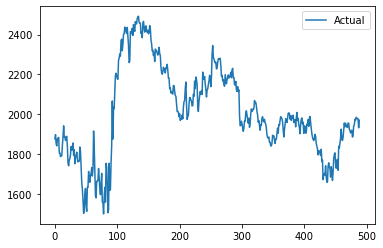

In [126]:
import matplotlib.pyplot as plt
plt.plot(dataset['close'], label='Actual')
plt.legend()
plt.show()

### Check For Null values

In [99]:
dataset.isnull().sum()

Date            0
OPEN            0
HIGH            0
LOW             0
PREV.CLOSE      0
close           0
No of trades    0
year            0
month           0
day             0
dtype: int64

In [100]:
data = dataset.filter(['close']).values


In [101]:
data

array([[1877.3 ],
       [1897.35],
       [1850.75],
       [1841.3 ],
       [1875.8 ],
       [1881.05],
       [1883.65],
       [1806.05],
       [1805.85],
       [1787.8 ],
       [1789.9 ],
       [1791.6 ],
       [1845.55],
       [1886.  ],
       [1941.85],
       [1886.05],
       [1886.75],
       [1868.7 ],
       [1885.2 ],
       [1889.45],
       [1835.15],
       [1754.65],
       [1741.15],
       [1769.35],
       [1777.8 ],
       [1797.75],
       [1838.1 ],
       [1819.4 ],
       [1835.1 ],
       [1855.95],
       [1794.65],
       [1821.9 ],
       [1751.65],
       [1792.2 ],
       [1787.45],
       [1809.3 ],
       [1772.1 ],
       [1760.8 ],
       [1766.6 ],
       [1764.3 ],
       [1835.65],
       [1813.55],
       [1737.7 ],
       [1658.9 ],
       [1623.7 ],
       [1570.4 ],
       [1502.15],
       [1516.15],
       [1597.3 ],
       [1627.  ],
       [1539.85],
       [1512.05],
       [1633.8 ],
       [1632.4 ],
       [1712.75],
       [16

### Scaling The Data

In [102]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
data=mm.fit_transform(data)

### Splitting The Data as Training Dataset And Testing Dataset

In [103]:
train_size = int(len(data) * 0.7)
train_data = data[:train_size, :]
test_data = data[train_size:, :]

In [104]:
len(test_data)

147

### Converting The data into the shape in which that data is going to implement on madel

In [105]:
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)


In [106]:
sequence_length = 60

x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

In [107]:
x_train

array([[0.38050869, 0.40070511, 0.35376479, ..., 0.19153866, 0.20584236,
        0.23429867],
       [0.40070511, 0.35376479, 0.34424578, ..., 0.20584236, 0.23429867,
        0.19174012],
       [0.35376479, 0.34424578, 0.37899773, ..., 0.23429867, 0.19174012,
        0.2264417 ],
       ...,
       [0.68738353, 0.69534122, 0.6995719 , ..., 0.47856963, 0.46074037,
        0.45439436],
       [0.69534122, 0.6995719 , 0.71649459, ..., 0.46074037, 0.45439436,
        0.43359355],
       [0.6995719 , 0.71649459, 0.68889449, ..., 0.45439436, 0.43359355,
        0.40090657]])

In [108]:
len(x_test)

87

In [109]:
len(x_train)

282

In [110]:
y_train,len(y_train)

(array([0.19174012, 0.2264417 , 0.41949131, 0.33966255, 0.21782926,
        0.09257114, 0.08133971, 0.16509695, 0.16580206, 0.1713926 ,
        0.22981617, 0.1823722 , 0.12712163, 0.09745656, 0.1567867 ,
        0.20503651, 0.0596827 , 0.05600604, 0.        , 0.08456308,
        0.13452531, 0.05963233, 0.25630823, 0.2354067 , 0.14756988,
        0.00559053, 0.02130446, 0.25625787, 0.11891211, 0.12389826,
        0.25812138, 0.34469907, 0.5713926 , 0.378897  , 0.54061949,
        0.53220851, 0.61435407, 0.7005792 , 0.71165953, 0.69690254,
        0.68506673, 0.68113825, 0.77829262, 0.78761017, 0.80891463,
        0.79853941, 0.8763032 , 0.8841098 , 0.82523294, 0.85691262,
        0.90878872, 0.91070259, 0.94490053, 0.94243264, 0.92143037,
        0.9127172 , 0.94374213, 0.89861496, 0.85258121, 0.7657517 ,
        0.77431377, 0.92112818, 0.92213548, 0.91130698, 0.93885671,
        0.90279527, 0.95814656, 0.93563334, 0.92374717, 0.97295392,
        0.96177285, 0.96136993, 0.98972551, 0.99

### Importing The Libraries For The LSTM

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### Preparing The LSTM Model

In [112]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [113]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Training The Data On LSTM Model

In [114]:
model.fit(x_train,y_train,epochs=5,batch_size=10)

Epoch 1/5
29/29 [==============================] - 43s 429ms/step - loss: 0.0803
Epoch 2/5
29/29 [==============================] - 13s 445ms/step - loss: 0.0191
Epoch 3/5
29/29 [==============================] - 13s 437ms/step - loss: 0.0148
Epoch 4/5
29/29 [==============================] - 13s 450ms/step - loss: 0.0111
Epoch 5/5
29/29 [==============================] - 13s 431ms/step - loss: 0.0095


### Predicting The Outputs For Our Test Data

In [115]:
predictions = model.predict(x_test)

3/3 [==============================] - 7s 286ms/step


In [116]:
predictions = mm.inverse_transform(predictions)

### Predicted Outputs

In [117]:
predictions

array([[1970.53  ],
       [1967.8167],
       [1964.5831],
       [1961.6245],
       [1959.2251],
       [1957.9697],
       [1957.4756],
       [1958.1825],
       [1960.2568],
       [1963.0659],
       [1965.7336],
       [1967.3887],
       [1967.4241],
       [1965.5549],
       [1961.8148],
       [1956.645 ],
       [1950.8772],
       [1944.9207],
       [1938.5542],
       [1931.6371],
       [1924.0588],
       [1915.5316],
       [1906.5077],
       [1897.401 ],
       [1888.4382],
       [1879.6846],
       [1871.7933],
       [1864.1519],
       [1856.7224],
       [1848.1119],
       [1838.3802],
       [1827.886 ],
       [1816.9691],
       [1806.7413],
       [1797.044 ],
       [1787.5326],
       [1778.223 ],
       [1770.3708],
       [1764.8231],
       [1761.5162],
       [1760.2144],
       [1759.9397],
       [1760.8741],
       [1762.5907],
       [1764.1295],
       [1765.623 ],
       [1768.1257],
       [1772.305 ],
       [1778.404 ],
       [1785.4752],


In [121]:
y_test=mm.inverse_transform(y_test.reshape(-1,1))

In [122]:
y_test

array([[1905.25],
       [1906.5 ],
       [1951.35],
       [1945.8 ],
       [1973.3 ],
       [1939.45],
       [1980.75],
       [1989.  ],
       [1956.3 ],
       [1928.  ],
       [1901.7 ],
       [1884.65],
       [1873.7 ],
       [1868.15],
       [1876.8 ],
       [1899.35],
       [1889.  ],
       [1853.6 ],
       [1839.15],
       [1824.7 ],
       [1795.9 ],
       [1816.1 ],
       [1815.85],
       [1805.9 ],
       [1792.9 ],
       [1824.4 ],
       [1762.  ],
       [1769.25],
       [1671.9 ],
       [1698.4 ],
       [1702.1 ],
       [1694.45],
       [1741.45],
       [1686.75],
       [1658.3 ],
       [1660.25],
       [1737.8 ],
       [1756.25],
       [1732.9 ],
       [1730.3 ],
       [1684.55],
       [1736.95],
       [1712.75],
       [1667.7 ],
       [1708.65],
       [1778.45],
       [1797.55],
       [1806.35],
       [1754.5 ],
       [1729.  ],
       [1767.45],
       [1773.35],
       [1718.7 ],
       [1839.4 ],
       [1830.65],
       [18

### Finding The Error

In [123]:
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print('RMSE:', rmse)

RMSE: 69.84489732055935


### The Error looks Like minimum, so Our model performance is good

In [124]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test,predictions))

69.84489732055935

### Visualising The Both Testing Outputs and The PreDicted Outputs

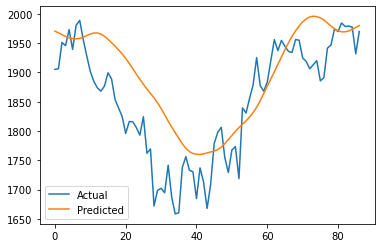

In [125]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

### Observations From Above Graph :
### The both the lines looks like same, so the model performance is nice